# El Perceptrón

Este notebook acompaña el siguiente [post](https://www.sensioai.com/blog/red-neuronal).

## Descarga datos

In [3]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

# petal length, petal width
X = iris.data[:, (2, 3)]  
y = (iris.target == 0).astype(np.int)

## El Perceptrón

In [76]:
class Perceptron():
  def __init__(self, size=2, epochs=50, lr=0.001):
    self.w = np.random.randn(size) # w1, w2
    self.b = np.zeros(1) # w0
    self.epochs = epochs
    self.lr = lr
    self.ws, self.bs = [], []

  def fit(self, X, y):
    for epoch in range(self.epochs):
      for i in range(len(X)):    
        _x, _y = X[i], y[i]  
        h = self.predict(self.w, self.b, _x)  
        # función de pérdida (MSE)
        l = 0.5*(h - _y)**2
        # derivadas
        dldh = (h - _y)
        dhdw = _x
        dldw = dldh*dhdw
        dldb = dldh
        # update
        self.w = self.w - self.lr*dldw
        self.b = self.b - self.lr*dldb
      self.ws.append(self.w)
      self.bs.append(self.b)

  def predict(self, w, b, x):
    return w.dot(x.T) + b > 0 

In [77]:
perceptron = Perceptron()

perceptron.fit(X, y)

## Visualización

In [78]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

def plot(epoch, w, b):
    ax.clear()
    tit = ax.set_title(f"Epoch {epoch+1}", fontsize=14)
    axes = [0, 5, 0, 2]
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = perceptron.predict(w, b, X_new)
    zz = y_predict.reshape(x0.shape)

    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

    a = -w[0]/w[1]
    b = -b/w[1]

    ax.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return [tit]

def get_anim(fig, ax, ws, bs):
    def anim(i):
        return plot(i, ws[i], bs[i])
    return anim

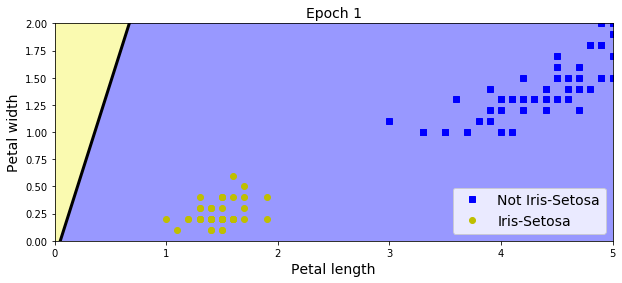

In [79]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, perceptron.ws, perceptron.bs)
anim = animation.FuncAnimation(fig, animate, frames=len(perceptron.ws), interval=100, blit=True)

In [80]:
anim